In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from PIL import Image
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [30]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


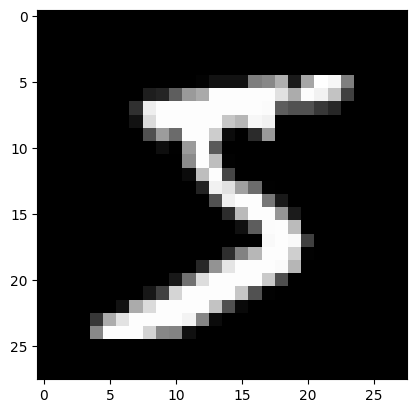

In [32]:
plt.imshow(train_images[0], cmap='gray')

In [33]:
# Convert images to one-dimensional arrays
num_train_samples = train_images.shape[0]
num_test_samples = test_images.shape[0]
num_features = train_images.shape[1] * train_images.shape[2]

train_images_reshaped = train_images.reshape((num_train_samples, num_features))
test_images_reshaped = test_images.reshape((num_test_samples, num_features))

# Create DataFrames for training and testing data
df_train = pd.DataFrame(train_images_reshaped)
df_test = pd.DataFrame(test_images_reshaped)

# Add a column for labels at the end
df_train['label'] = train_labels
df_test['label'] = test_labels

In [34]:
print(df_train.shape)
print(df_test.shape)

(60000, 785)
(10000, 785)


In [35]:
df_train[df_train["label"]==0]

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


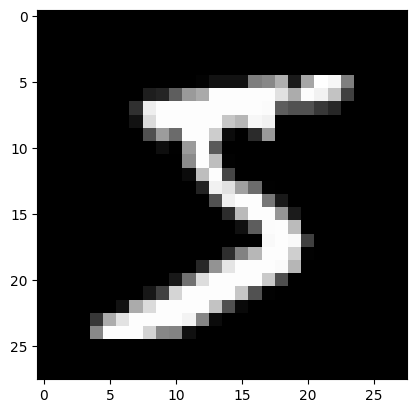

In [36]:
item = df_train.drop('label', axis=1).iloc[0].values.reshape(28,28)
plt.imshow(item, cmap='gray')

In [11]:
# Generate dataset with only samples from a single label

df_train_all = pd.DataFrame()
df_test_all = pd.DataFrame()

for i in range(0,10):
    df_train_aux = df_train[df_train["label"]==i]   
    df_test_aux = df_test[df_test["label"]==i] 
    print(f"{i}: {df_train_aux.shape}, {df_test_aux.shape}") 
    
    df_train_all = pd.concat([df_train_all, df_train_aux])
    df_test_all = pd.concat([df_test_all, df_test_aux]) 
    
    df_train_aux.reset_index(drop=True, inplace=True)
    df_test_aux.reset_index(drop=True, inplace=True)
      
    df_train_aux.to_pickle(f"/home/renan/Documentos/tmp/Datasets/mnist/non-iid/{i+1}_train.pickle")
    df_test_aux.to_pickle(f"/home/renan/Documentos/tmp/Datasets/mnist/non-iid/{i+1}_test.pickle")

df_train_all.reset_index(drop=True, inplace=True)
df_test_all.reset_index(drop=True, inplace=True)
df_train_all.to_pickle(f"/home/renan/Documentos/tmp/Datasets/mnist/mnist/train.pickle")
df_test_all.to_pickle(f"/home/renan/Documentos/tmp/Datasets/mnist/mnist/test.pickle")


0: (5923, 785), (980, 785)
1: (6742, 785), (1135, 785)
2: (5958, 785), (1032, 785)
3: (6131, 785), (1010, 785)
4: (5842, 785), (982, 785)
5: (5421, 785), (892, 785)
6: (5918, 785), (958, 785)
7: (6265, 785), (1028, 785)
8: (5851, 785), (974, 785)
9: (5949, 785), (1009, 785)


In [37]:
train = pd.read_pickle(f"/home/renan/Documentos/tmp/Datasets/mnist/mnist/train.pickle")
test = pd.read_pickle(f"/home/renan/Documentos/tmp/Datasets/mnist/mnist/test.pickle")

x_train = train.drop(['label'], axis=1)
y_train = np.array(train['label'])

x_test = test.drop(['label'], axis=1)
y_test = np.array(test['label'])

print(df_train.shape)
print(df_test.shape)

(60000, 785)
(10000, 785)


In [38]:
def create_model():
    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)), 
            tf.keras.layers.Dense(10, activation="softmax")
        ]
    )

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )

    return model

In [22]:
def create_model():
    model = tf.keras.models.Sequential([

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)), 
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D((2, 2), strides=(2, 2)),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy']
    )
    
    return model
    
x_train = np.array([x.reshape(28,28) for x in x_train.reset_index(drop=True).values])
x_test = np.array([x.reshape(28,28) for x in x_test.reset_index(drop=True).values])

In [39]:
warnings.filterwarnings("ignore")
model = create_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.fit(x_train, y_train,
            batch_size=128,
            epochs=5,
            validation_data=(x_test, y_test),
            verbose=1)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 4.2907 - accuracy: 0.8642 - val_loss: 1.0426 - val_accuracy: 0.8917
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.6143 - accuracy: 0.9053 - val_loss: 0.5643 - val_accuracy: 0.9058
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3350 - accuracy: 0.9301 - val_loss: 0.4153 - val_accuracy: 0.9292
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2504 - accuracy: 0.9416 - val_loss: 0.3613 - val_accuracy: 0.9304
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1915 - accuracy: 0.9513 - val_loss: 0.3570 - val_accuracy: 0.9384


In [26]:
import random
# Amount of data on the initial partition
np.random.seed(7)
limite_inferior = 0.25
limite_superior = 1
total_valores = 100
valores_distribuicao = np.random.uniform(limite_inferior, limite_superior, total_valores)
valores_distribuicao

array([0.30723122, 0.83493909, 0.57880692, 0.79259888, 0.98349213,
       0.6538719 , 0.62584035, 0.30403835, 0.45132924, 0.62491188,
       0.7594225 , 0.85280428, 0.53570585, 0.29945226, 0.4661092 ,
       0.93219515, 0.41003902, 0.58909297, 0.94840451, 0.26867442,
       0.70041169, 0.96259713, 0.42272716, 0.66136744, 0.93184628,
       0.34987708, 0.64255944, 0.81280739, 0.75175993, 0.60081464,
       0.40363682, 0.61807442, 0.52928852, 0.60805087, 0.52441779,
       0.8784385 , 0.82648563, 0.48549601, 0.679469  , 0.45703679,
       0.5896322 , 0.51473377, 0.7430496 , 0.52776331, 0.59431973,
       0.78949309, 0.55974387, 0.92981745, 0.38533871, 0.80583915,
       0.56678053, 0.56984018, 0.7257849 , 0.64217965, 0.56116448,
       0.25107016, 0.31919676, 0.7820458 , 0.6432592 , 0.77212035,
       0.96660124, 0.76218539, 0.28984652, 0.48163951, 0.69444602,
       0.42634031, 0.97372825, 0.95878617, 0.88630066, 0.604243  ,
       0.88110754, 0.34833298, 0.48155024, 0.5972473 , 0.80638

k: 1 -> i: 1 -> phi: 0.9 -> per: 0.011111111111111108
label
0    6213
1      88
7      81
3      79
2      78
9      77
8      76
4      76
6      76
5      70
Name: count, dtype: int64
Prob: 0.30723121703046785
>>>>>>>
label
0    1917
1      29
6      28
4      25
8      23
9      22
3      22
2      20
5      19
7      19
Name: count, dtype: int64
<<<<<<<
1
n_rand: -12


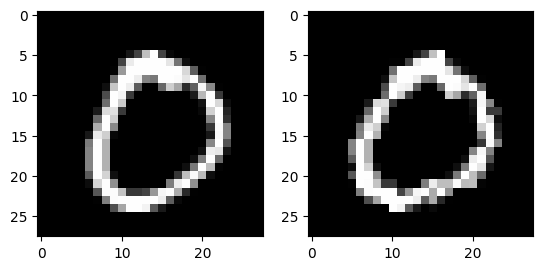

##########@@>
label
0    1434
4      24
1      23
6      21
5      17
3      16
2      16
8      15
9      14
7      13
Name: count, dtype: int64
label
0    483
8      8
9      8
6      7
3      6
1      6
7      6
2      4
5      2
4      1
Name: count, dtype: int64
-------------------
k: 2 -> i: 2 -> phi: 0.9 -> per: 0.011111111111111108
label
1    7089
7      81
3      79
2      78
9      77
0      77
8      76
4      76
6      76
5      70
Name: count, dtype: int64
Prob: 0.8349390941800859
>>>>>>>
label
1    5926
2      68
3      67
0      66
7      65
4      63
9      63
6      62
5      60
8      55
Name: count, dtype: int64
<<<<<<<
1
n_rand: 14


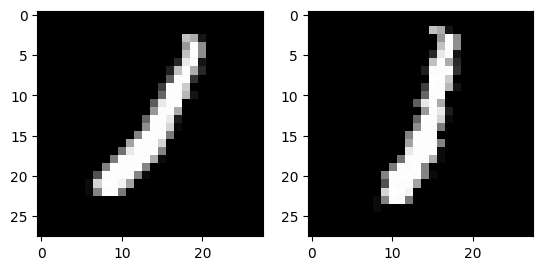

##########@@>
label
1    4441
3      56
2      52
0      52
4      52
5      49
7      46
9      44
8      41
6      38
Name: count, dtype: int64
label
1    1485
6      24
9      19
7      19
2      16
8      14
0      14
3      11
5      11
4      11
Name: count, dtype: int64
-------------------
k: 3 -> i: 3 -> phi: 0.9 -> per: 0.011111111111111108
label
2    6291
1      88
7      81
3      79
9      77
0      77
6      76
4      76
8      76
5      70
Name: count, dtype: int64
Prob: 0.5788069235806701
>>>>>>>
label
2    3641
0      52
9      48
3      48
4      47
1      47
7      45
6      40
5      39
8      39
Name: count, dtype: int64
<<<<<<<
1
n_rand: -4


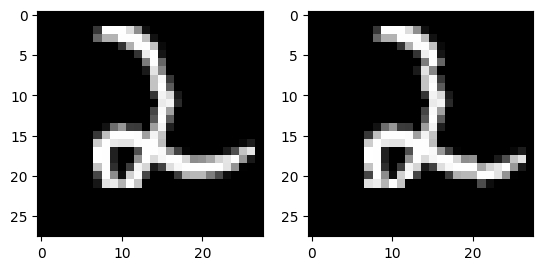

##########@@>
label
2    2739
3      38
1      38
9      35
4      35
0      35
7      32
8      29
5      28
6      25
Name: count, dtype: int64
label
2    902
0     17
6     15
9     13
7     13
4     12
5     11
3     10
8     10
1      9
Name: count, dtype: int64
-------------------
k: 4 -> i: 4 -> phi: 0.9 -> per: 0.011111111111111108
label
3    6427
1      88
7      81
2      78
0      77
9      77
8      76
4      76
6      76
5      70
Name: count, dtype: int64
Prob: 0.7925988833732059
>>>>>>>
label
3    5103
9      63
0      62
6      62
1      62
8      61
4      60
2      60
7      59
5      56
Name: count, dtype: int64
<<<<<<<
1
n_rand: -28


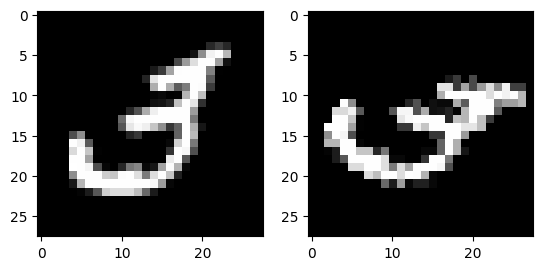

##########@@>
label
3    3828
1      50
8      48
2      48
0      47
4      46
9      46
6      45
7      43
5      35
Name: count, dtype: int64
label
3    1275
5      21
9      17
6      17
7      16
0      15
4      14
8      13
1      12
2      12
Name: count, dtype: int64
-------------------
k: 5 -> i: 5 -> phi: 0.9 -> per: 0.011111111111111108
label
4    6142
1      88
7      81
3      79
2      78
9      77
0      77
8      76
6      76
5      70
Name: count, dtype: int64
Prob: 0.9834921339974521
>>>>>>>
label
4    6043
1      87
7      81
3      78
9      77
0      76
8      75
2      73
6      72
5      69
Name: count, dtype: int64
<<<<<<<
1
n_rand: -24


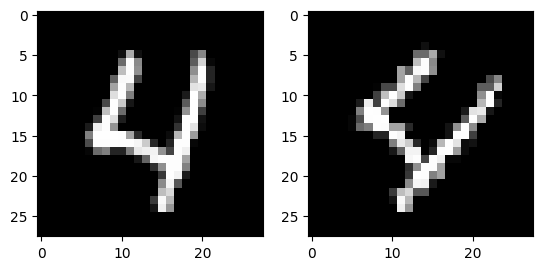

##########@@>
label
4    4523
7      67
1      66
0      61
8      61
3      57
6      57
5      54
2      51
9      51
Name: count, dtype: int64
label
4    1520
9      26
2      22
3      21
1      21
0      15
5      15
6      15
7      14
8      14
Name: count, dtype: int64
-------------------


In [27]:
# Generate dataset
qtde = 5

np.random.seed(1)
X_train, X_test, y_train, y_test = 0, 0, 0, 0
##
phi = 0.9
per = (1-phi) / 9 

for k in range(0, qtde):
    
    i = (k % 10) + 1

    print(f"k: {k+1} -> i: {i} -> phi: {phi} -> per: {per}")
    
    df_base = pd.DataFrame([])    
    for j in range(1,11): 
        df_train = pd.read_pickle(f"/home/renan/Documentos/tmp/Datasets/mnist/non-iid/{j}_train.pickle")
        df_test = pd.read_pickle(f"/home/renan/Documentos/tmp/Datasets/mnist/non-iid/{j}_test.pickle")
        df = pd.concat([df_train, df_test]).sample(frac=1, random_state=1)
        
        if i==j:
            df_aux = df.sample(frac=phi)           
        else:
            df_aux = df.sample(frac=per)        
               
        df_base = pd.concat([df_base, df_aux]).sample(frac=1)
    
    print(df_base["label"].value_counts())    
    prob = valores_distribuicao[k]
    print(f"Prob: {prob}")
    print(">>>>>>>")
    
    df_final = df_base.sample(frac=prob, random_state=1)
    print(df_final["label"].value_counts())
    
    print("<<<<<<<")
    
    array_final = df_final.drop(columns=["label"]).to_numpy()
    
    aux_teste = array_final[3].reshape(28,28).copy() # imprime logo abaixo
    for ii, item in enumerate(array_final):
        n_rand = random.randint(-45, 45) 
        
        imagem_original = array_final[ii].reshape(28,28).copy()
        imagem_pil = Image.fromarray(imagem_original)
        imagem_rotacionada = np.array(imagem_pil.rotate(n_rand))
        array_final[ii] = imagem_rotacionada.flatten()
        
        if ii == 1:
            print(f"{ii}")
            print(f"n_rand: {n_rand}")
            
            
            plt.clf()
            plt.subplot(1, 2, 1)
            plt.imshow(imagem_original, cmap='gray')            
           
            plt.subplot(1, 2, 2)
            plt.imshow(imagem_rotacionada, cmap='gray')
            plt.show()
            
         
    print(f"##########@@>")
    df_rotation_final = pd.DataFrame(array_final)
    df_rotation_final.reset_index(drop=True, inplace=True)
    df_rotation_final["label"] = df_final["label"].values      
    
    X_train, X_test, y_train, y_test = train_test_split(df_rotation_final, df_rotation_final['label'], test_size=0.25, shuffle=True)
    
    X_train.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    
    X_train.to_pickle(f"/home/renan/Documentos/tmp/Datasets/mnist/non-iid-0.9-100-rotation-45/{k+1}_train.pickle")
    X_test.to_pickle(f"/home/renan/Documentos/tmp/Datasets/mnist/non-iid-0.9-100-rotation-45/{k+1}_test.pickle")
    
    print(X_train["label"].value_counts())
    print(X_test["label"].value_counts())          
    print("-------------------")